# Convolution Nets for MNIST

Deep Learning models can take quite a bit of time to run, particularly if GPU isn't used. 

In the interest of time, you could sample a subset of observations (e.g. $1000$) that are a particular number of your choice (e.g. $6$) and $1000$ observations that aren't that particular number (i.e. $\neq 6$). 

We will build a model using that and see how it performs on the test dataset

In [1]:
#Import the required libraries
import numpy as np
np.random.seed(1338)

from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
from keras.models import Sequential

In [3]:
from keras.layers.core import Dense, Dropout, Activation, Flatten

In [4]:
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

In [5]:
from keras.utils import np_utils
from keras.optimizers import SGD

## Loading Data

In [6]:
path_to_dataset = "/home/ubuntu/deep-learning-keras-tensorflow/data/mnist.pkl.gz"

#Load the training and testing data
(X_train, y_train), (X_test, y_test) = mnist.load_data(path_to_dataset)

In [7]:
X_test_orig = X_test

## Data Preparation

In [8]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [9]:
# Seed for reproducibilty
np.random.seed(1338)

# Test data
X_test = X_test.copy()
Y = y_test.copy()

# Converting the output to binary classification(Six=1,Not Six=0)
Y_test = Y == 6
Y_test = Y_test.astype(int)

# Selecting the 5918 examples where the output is 6
X_six = X_train[y_train == 6].copy()
Y_six = y_train[y_train == 6].copy()

# Selecting the examples where the output is not 6
X_not_six = X_train[y_train != 6].copy()
Y_not_six = y_train[y_train != 6].copy()

# Selecting 6000 random examples from the data that 
# only contains the data where the output is not 6
random_rows = np.random.randint(0,X_six.shape[0],6000)
X_not_six = X_not_six[random_rows]
Y_not_six = Y_not_six[random_rows]

In [10]:
# Appending the data with output as 6 and data with output as <> 6
X_train = np.append(X_six,X_not_six)

# Reshaping the appended data to appropraite form
X_train = X_train.reshape(X_six.shape[0] + X_not_six.shape[0], img_rows, img_cols,1)

# Appending the labels and converting the labels to 
# binary classification(Six=1,Not Six=0)
Y_labels = np.append(Y_six,Y_not_six)
Y_train = Y_labels == 6 
Y_train = Y_train.astype(int)

In [11]:
print(X_train.shape, Y_labels.shape, X_test.shape, Y_test.shape)

(11918, 28, 28, 1) (11918,) (10000, 28, 28, 1) (10000,)


In [12]:
# Converting the classes to its binary categorical form
nb_classes = 2
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

# A simple CNN

In [13]:
#Initializing the values for the convolution neural network
nb_epoch = 2
batch_size = 128
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

### Step 1: Model Definition

In [14]:
model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_rows, img_cols,1)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

### Step 2: Compile

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### Step 3: Fit

In [16]:
model.fit(X_train, Y_train, batch_size=batch_size, 
          nb_epoch=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 11918 samples, validate on 10000 samples
Epoch 1/2
11918/11918 [==============================] - 4s - loss: 0.3033 - acc: 0.9382 - val_loss: 0.1746 - val_acc: 0.9557
Epoch 2/2
11918/11918 [==============================] - 3s - loss: 0.1369 - acc: 0.9602 - val_loss: 0.1499 - val_acc: 0.9515


### Step 4: Evaluate

In [17]:
# Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.149916631544
Test accuracy: 0.9515


### Let's plot our model Predictions!

In [18]:
import matplotlib.pyplot as plt

%matplotlib inline

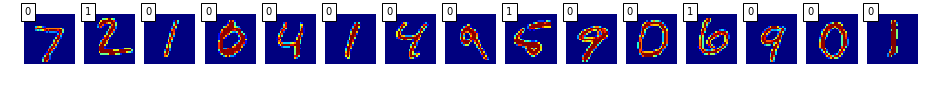

In [19]:
slice = 15
predicted = model.predict(X_test[:slice]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

# Adding more Dense Layers

In [20]:
model = Sequential()
model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_rows, img_cols,1)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          nb_epoch=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 11918 samples, validate on 10000 samples
Epoch 1/2
11918/11918 [==============================] - 7s - loss: 0.3020 - acc: 0.9326 - val_loss: 0.1210 - val_acc: 0.9703
Epoch 2/2
11918/11918 [==============================] - 7s - loss: 0.1198 - acc: 0.9637 - val_loss: 0.1133 - val_acc: 0.9622


In [22]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.113300963235
Test accuracy: 0.9622


# Adding Dropout

In [23]:
import tensorflow as tf
tf.python.control_flow_ops = tf

In [24]:
model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_rows, img_cols,1)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          nb_epoch=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 11918 samples, validate on 10000 samples
Epoch 1/2
11918/11918 [==============================] - 7s - loss: 0.2821 - acc: 0.9286 - val_loss: 0.2185 - val_acc: 0.9224
Epoch 2/2
11918/11918 [==============================] - 9s - loss: 0.1220 - acc: 0.9631 - val_loss: 0.0912 - val_acc: 0.9705


In [26]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.0912129176855
Test accuracy: 0.9705


# Adding more Convolution Layers

In [27]:
model = Sequential()
model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_rows, img_cols,1)))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          nb_epoch=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 11918 samples, validate on 10000 samples
Epoch 1/2
11918/11918 [==============================] - 16s - loss: 0.6112 - acc: 0.7496 - val_loss: 0.4618 - val_acc: 0.8888
Epoch 2/2
11918/11918 [==============================] - 15s - loss: 0.2683 - acc: 0.9168 - val_loss: 0.1485 - val_acc: 0.9562


In [29]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.148507375973
Test accuracy: 0.9562


# Exercise

The above code has been written as a function. 

Change some of the **hyperparameters** and see what happens. 

In [30]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

def build_model():
    """"""
    model = Sequential()
    model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_rows, img_cols,1)))
    model.add(Activation('relu'))
    model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

    model.fit(X_train, Y_train, batch_size=batch_size, 
              nb_epoch=nb_epoch,verbose=1,
              validation_data=(X_test, Y_test))
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score)
    print('Test accuracy:', accuracy)

In [31]:
#Timing how long it takes to build the model and test it.
%timeit -n1 -r1 build_model()

Train on 11918 samples, validate on 10000 samples
Epoch 1/2
11918/11918 [==============================] - 18s - loss: 0.6337 - acc: 0.7351 - val_loss: 0.5278 - val_acc: 0.8435
Epoch 2/2
11918/11918 [==============================] - 15s - loss: 0.2991 - acc: 0.9097 - val_loss: 0.1805 - val_acc: 0.9432
Test score: 0.180504751903
Test accuracy: 0.9432
1 loop, best of 1: 38.7 s per loop


# Batch Normalisation

Normalize the activations of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.

## How to BatchNorm in Keras

```python
from keras.layers.normalization import BatchNormalization

BatchNormalization(epsilon=1e-06, mode=0, 
                   axis=-1, momentum=0.99, 
                   weights=None, beta_init='zero', 
                   gamma_init='one')
```

In [32]:
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                    border_mode='valid',
                    input_shape=(img_rows, img_cols,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))
# model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
          optimizer='sgd',
          metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          nb_epoch=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))


#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Train on 11918 samples, validate on 10000 samples
Epoch 1/2


FailedPreconditionError: Attempting to use uninitialized value batchnormalization_1_running_mean/biased
	 [[Node: batchnormalization_1_running_mean/biased/read = Identity[T=DT_FLOAT, _class=["loc:@batchnormalization_1_running_mean"], _device="/job:localhost/replica:0/task:0/cpu:0"](batchnormalization_1_running_mean/biased)]]

Caused by op 'batchnormalization_1_running_mean/biased/read', defined at:
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-4ae7110b2af1>", line 7, in <module>
    model.add(BatchNormalization())
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/keras/models.py", line 307, in add
    output_tensor = layer(self.outputs[0])
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/keras/engine/topology.py", line 511, in __call__
    self.add_inbound_node(inbound_layers, node_indices, tensor_indices)
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/keras/engine/topology.py", line 569, in add_inbound_node
    Node.create_node(self, inbound_layers, node_indices, tensor_indices)
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/keras/engine/topology.py", line 150, in create_node
    output_tensors = to_list(outbound_layer.call(input_tensors[0], mask=input_masks[0]))
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/keras/layers/normalization.py", line 124, in call
    self.updates = [K.moving_average_update(self.running_mean, mean, self.momentum),
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py", line 288, in moving_average_update
    variable, value, momentum)
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/tensorflow/python/training/moving_averages.py", line 70, in assign_moving_average
    update_delta = _zero_debias(variable, value, decay)
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/tensorflow/python/training/moving_averages.py", line 177, in _zero_debias
    trainable=False)
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 1024, in get_variable
    custom_getter=custom_getter)
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 850, in get_variable
    custom_getter=custom_getter)
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 346, in get_variable
    validate_shape=validate_shape)
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 331, in _true_getter
    caching_device=caching_device, validate_shape=validate_shape)
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 677, in _get_single_variable
    expected_shape=shape)
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 224, in __init__
    expected_shape=expected_shape)
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 370, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1424, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/ubuntu/anaconda3/envs/deep-learning/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value batchnormalization_1_running_mean/biased
	 [[Node: batchnormalization_1_running_mean/biased/read = Identity[T=DT_FLOAT, _class=["loc:@batchnormalization_1_running_mean"], _device="/job:localhost/replica:0/task:0/cpu:0"](batchnormalization_1_running_mean/biased)]]
